In [1]:
import pandas as pd
import collections
import numpy as np
import seaborn as sns

from langdetect import detect

In [2]:
# df = pd.read_csv('./brazil/brazil_reviews.csv')
# df = pd.read_csv('./samerica/santiago.csv')
df = pd.read_csv('./buenos_aires/buenos_aires_reviews.csv')

In [3]:
df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7270,1015127,2012-03-18,1586988,Morgan,Great apartment in a fantastic location. Booke...
1,7270,1041539,2012-03-25,1476835,Terence,Toni was a great host and looked after me in B...
2,7270,1122580,2012-04-13,2087599,Antonio David,"Toni is a great guy and has a great loft, bett..."
3,7270,2580924,2012-10-11,1523475,Noémie,The apartment is very well located in the beau...
4,7270,2795303,2012-11-03,3004044,Jenna,We had a pleasant stay at the apartment! Toni ...
...,...,...,...,...,...,...
354199,40182934,567402061,2019-11-22,42254098,Agustin,El apartamento de Polo es ideal cuando se esta...
354200,40182934,568444634,2019-11-24,310686380,Agustin,Excelente ubicacion y atención. Lugar muy cómo...
354201,40229262,566589862,2019-11-19,310754674,Enrique Eduardo,The host canceled this reservation 2 days befo...
354202,40277986,567442064,2019-11-22,139274240,Karina,Thomas es un anfitrión sumamente amable. Queda...


In [4]:
df2 = df[df.comments.str[:34] != "The host canceled this reservation"]
df2 = df.head(1000)
df2

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7270,1015127,2012-03-18,1586988,Morgan,Great apartment in a fantastic location. Booke...
1,7270,1041539,2012-03-25,1476835,Terence,Toni was a great host and looked after me in B...
2,7270,1122580,2012-04-13,2087599,Antonio David,"Toni is a great guy and has a great loft, bett..."
3,7270,2580924,2012-10-11,1523475,Noémie,The apartment is very well located in the beau...
4,7270,2795303,2012-11-03,3004044,Jenna,We had a pleasant stay at the apartment! Toni ...
...,...,...,...,...,...,...
995,24157,5786902,2013-07-16,6645357,Christophe,Some details about our stay:\nReception: Angel...
996,24157,5889360,2013-07-21,5062316,David,"Angela was away when I arrived; however, her v..."
997,24157,6287101,2013-08-06,6747811,Guillaume,Very good stay at this location ! very well lo...
998,24157,6586767,2013-08-18,6886501,Renee,"Muy encantadora Virginie, el loft es un muy bu..."


In [25]:
# mean review length ignoring languages
df3 = df2['comments']
dfl = df3.str.len()
dfl.mean(axis = 0)

342.991

In [24]:
# creates table with languages distribution
langs = []
for i in df3:
    try:
        langs.append(detect(i))
    except:
        langs.append('Nan')
        continue

['en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'es',
 'en',
 'es',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'de',
 'en',
 'en',
 'en',
 'en',
 'es',
 'en',
 'en',
 'es',
 'es',
 'es',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'es',
 'en',
 'en',
 'en',
 'pt',
 'en',
 'en',
 'es',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'es',
 'en',
 'en',
 'pt',
 'es',
 'es',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'pt',
 'en',
 'pt',
 'en',
 'pt',
 'en',
 'en',
 'en',
 'pt',
 'pt',
 'pt',
 'en',
 'en',
 'en',
 'es',
 'es',
 'es',
 'en',
 'en',
 'en',
 'pt',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'es',
 'es',
 'pt',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'es',
 'pt',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'es',
 'en',
 'fr',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'es',
 'en',
 'pt',
 'pt',
 'es',
 'en',
 'fr',
 'en',
 'en',
 'en',
 'en',
 'en',
 'es',
 'en',
 'en',
 'en',
 'es',
 'en',

In [7]:
c = collections.Counter(langs)
freq = pd.DataFrame.from_dict(c, orient='index').reset_index()

In [8]:
freq = freq.apply(lambda x: x/len(df3) if x.name == 0 else x)

In [9]:
freq_sorted = freq.sort_values(by= [0], ascending=False)
freq_sorted

,index,0
0,en,0.620
1,es,0.183
3,pt,0.123
4,fr,0.042
2,de,0.014
7,it,0.006
5,ro,0.003
6,Nan,0.003
8,no,0.001
9,ca,0.001


In [10]:
export = freq_sorted.reset_index(drop=True)

In [11]:
export.to_csv(r'buenosaireslangs.csv')

In [12]:
# begin analysing specific languages
dfnew = df2.copy()
dfnew['lang'] = langs
dfnew

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang
0,7270,1015127,2012-03-18,1586988,Morgan,Great apartment in a fantastic location. Booke...,en
1,7270,1041539,2012-03-25,1476835,Terence,Toni was a great host and looked after me in B...,en
2,7270,1122580,2012-04-13,2087599,Antonio David,"Toni is a great guy and has a great loft, bett...",en
3,7270,2580924,2012-10-11,1523475,Noémie,The apartment is very well located in the beau...,en
4,7270,2795303,2012-11-03,3004044,Jenna,We had a pleasant stay at the apartment! Toni ...,en
...,...,...,...,...,...,...,...
995,24157,5786902,2013-07-16,6645357,Christophe,Some details about our stay:\nReception: Angel...,en
996,24157,5889360,2013-07-21,5062316,David,"Angela was away when I arrived; however, her v...",en
997,24157,6287101,2013-08-06,6747811,Guillaume,Very good stay at this location ! very well lo...,en
998,24157,6586767,2013-08-18,6886501,Renee,"Muy encantadora Virginie, el loft es un muy bu...",es


In [13]:
# first english
df_en = dfnew.loc[dfnew['lang'] == 'en'].copy()

In [14]:
df_en['len'] = df_en['comments'].str.len()
df_en

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang,len
0,7270,1015127,2012-03-18,1586988,Morgan,Great apartment in a fantastic location. Booke...,en,152
1,7270,1041539,2012-03-25,1476835,Terence,Toni was a great host and looked after me in B...,en,162
2,7270,1122580,2012-04-13,2087599,Antonio David,"Toni is a great guy and has a great loft, bett...",en,247
3,7270,2580924,2012-10-11,1523475,Noémie,The apartment is very well located in the beau...,en,1881
4,7270,2795303,2012-11-03,3004044,Jenna,We had a pleasant stay at the apartment! Toni ...,en,1438
...,...,...,...,...,...,...,...,...
994,24157,5640663,2013-07-09,3705041,Sally,We loved our stay in the San Telmo Loft! Angel...,en,358
995,24157,5786902,2013-07-16,6645357,Christophe,Some details about our stay:\nReception: Angel...,en,1329
996,24157,5889360,2013-07-21,5062316,David,"Angela was away when I arrived; however, her v...",en,601
997,24157,6287101,2013-08-06,6747811,Guillaume,Very good stay at this location ! very well lo...,en,298


In [15]:
# show mean
en_mean = np.mean(df_en['len'])
en_mean

385.08870967741933

In [16]:
# show max value
df_en['len'].max()

2666

In [17]:
# then spanish
df_es = dfnew.loc[dfnew['lang'] == 'es'].copy()

In [18]:
df_es['len'] = df_es['comments'].str.len()
df_es

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang,len
11,7270,116663731,2016-12-02,102925474,Claudia,El dpto es exacto las fotos. El anfitrión es e...,es,148
13,7270,259174711,2018-04-30,57734717,Clara,Bad experience.,es,15
25,11508,68315541,2016-04-04,12506315,Javier,"El apartamento es muy cómodo, tiene mucha luz ...",es,383
28,11508,124172812,2017-01-01,24103270,Andres,Como lo exprese en una reseña de mi estadía en...,es,484
29,11508,140730453,2017-03-31,75218361,Gustavo,Excelente departamento tanto en ubicacion (2 c...,es,192
...,...,...,...,...,...,...,...,...
906,23798,170968998,2017-07-16,134945213,Eugenia,El depto muy comodo y super completo. limpio y...,es,120
926,23798,267746501,2018-05-22,169954649,Valentina,"El departamento es amplio, acogedor y lindo. ...",es,236
940,23798,438361087,2019-04-16,1102592,Paul,Todo fenomenal. Muy amable y mucho jabón,es,41
991,24157,4686091,2013-05-20,6128433,Mariela,"Es un hermoso loft, muy cálido y bien ubicado....",es,107


In [19]:
# show mean
es_mean = np.mean(df_es['len'])
es_mean

227.56284153005464

In [20]:
# show max value
df_es['len'].max()

841

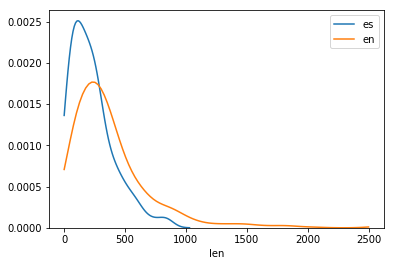

In [21]:
# density distibution for en and es
sns.distplot(df_es['len'], hist=False, kde_kws={'clip': (0, 2500)}, label = 'es')
sns.distplot(df_en['len'], hist=False, kde_kws={'clip': (0, 2500)}, label = 'en')